In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load iris dataset from UCI
data = load_iris()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'PCA Feature 2')

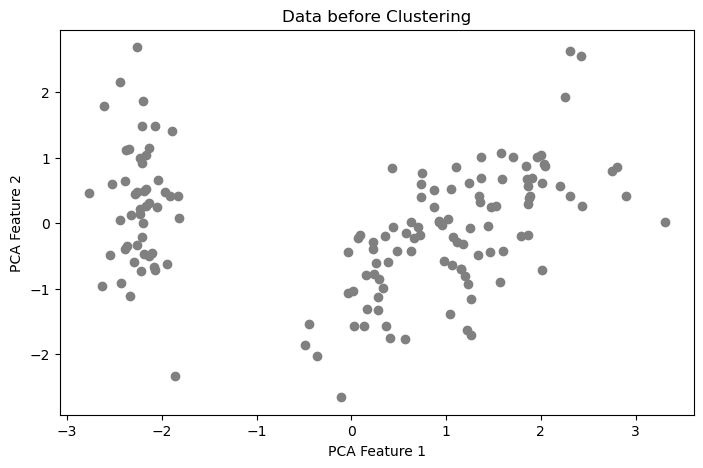

In [2]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Scatter plot before clustering
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', marker='o')
plt.title('Data before Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

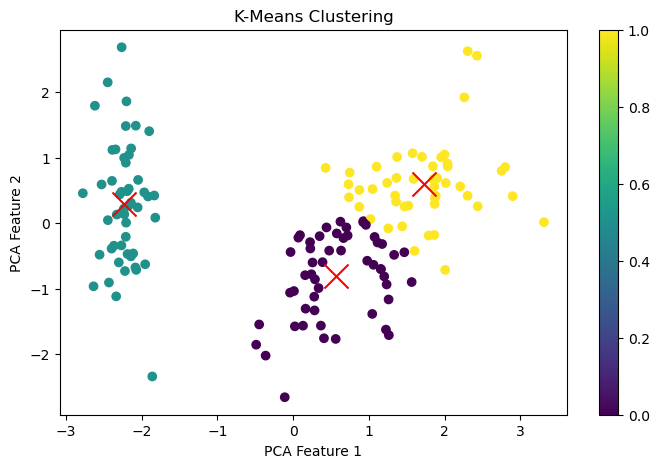

In [3]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
labels_kmeans = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot K-Means clusters
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='x')  # Centroids
plt.title('K-Means Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

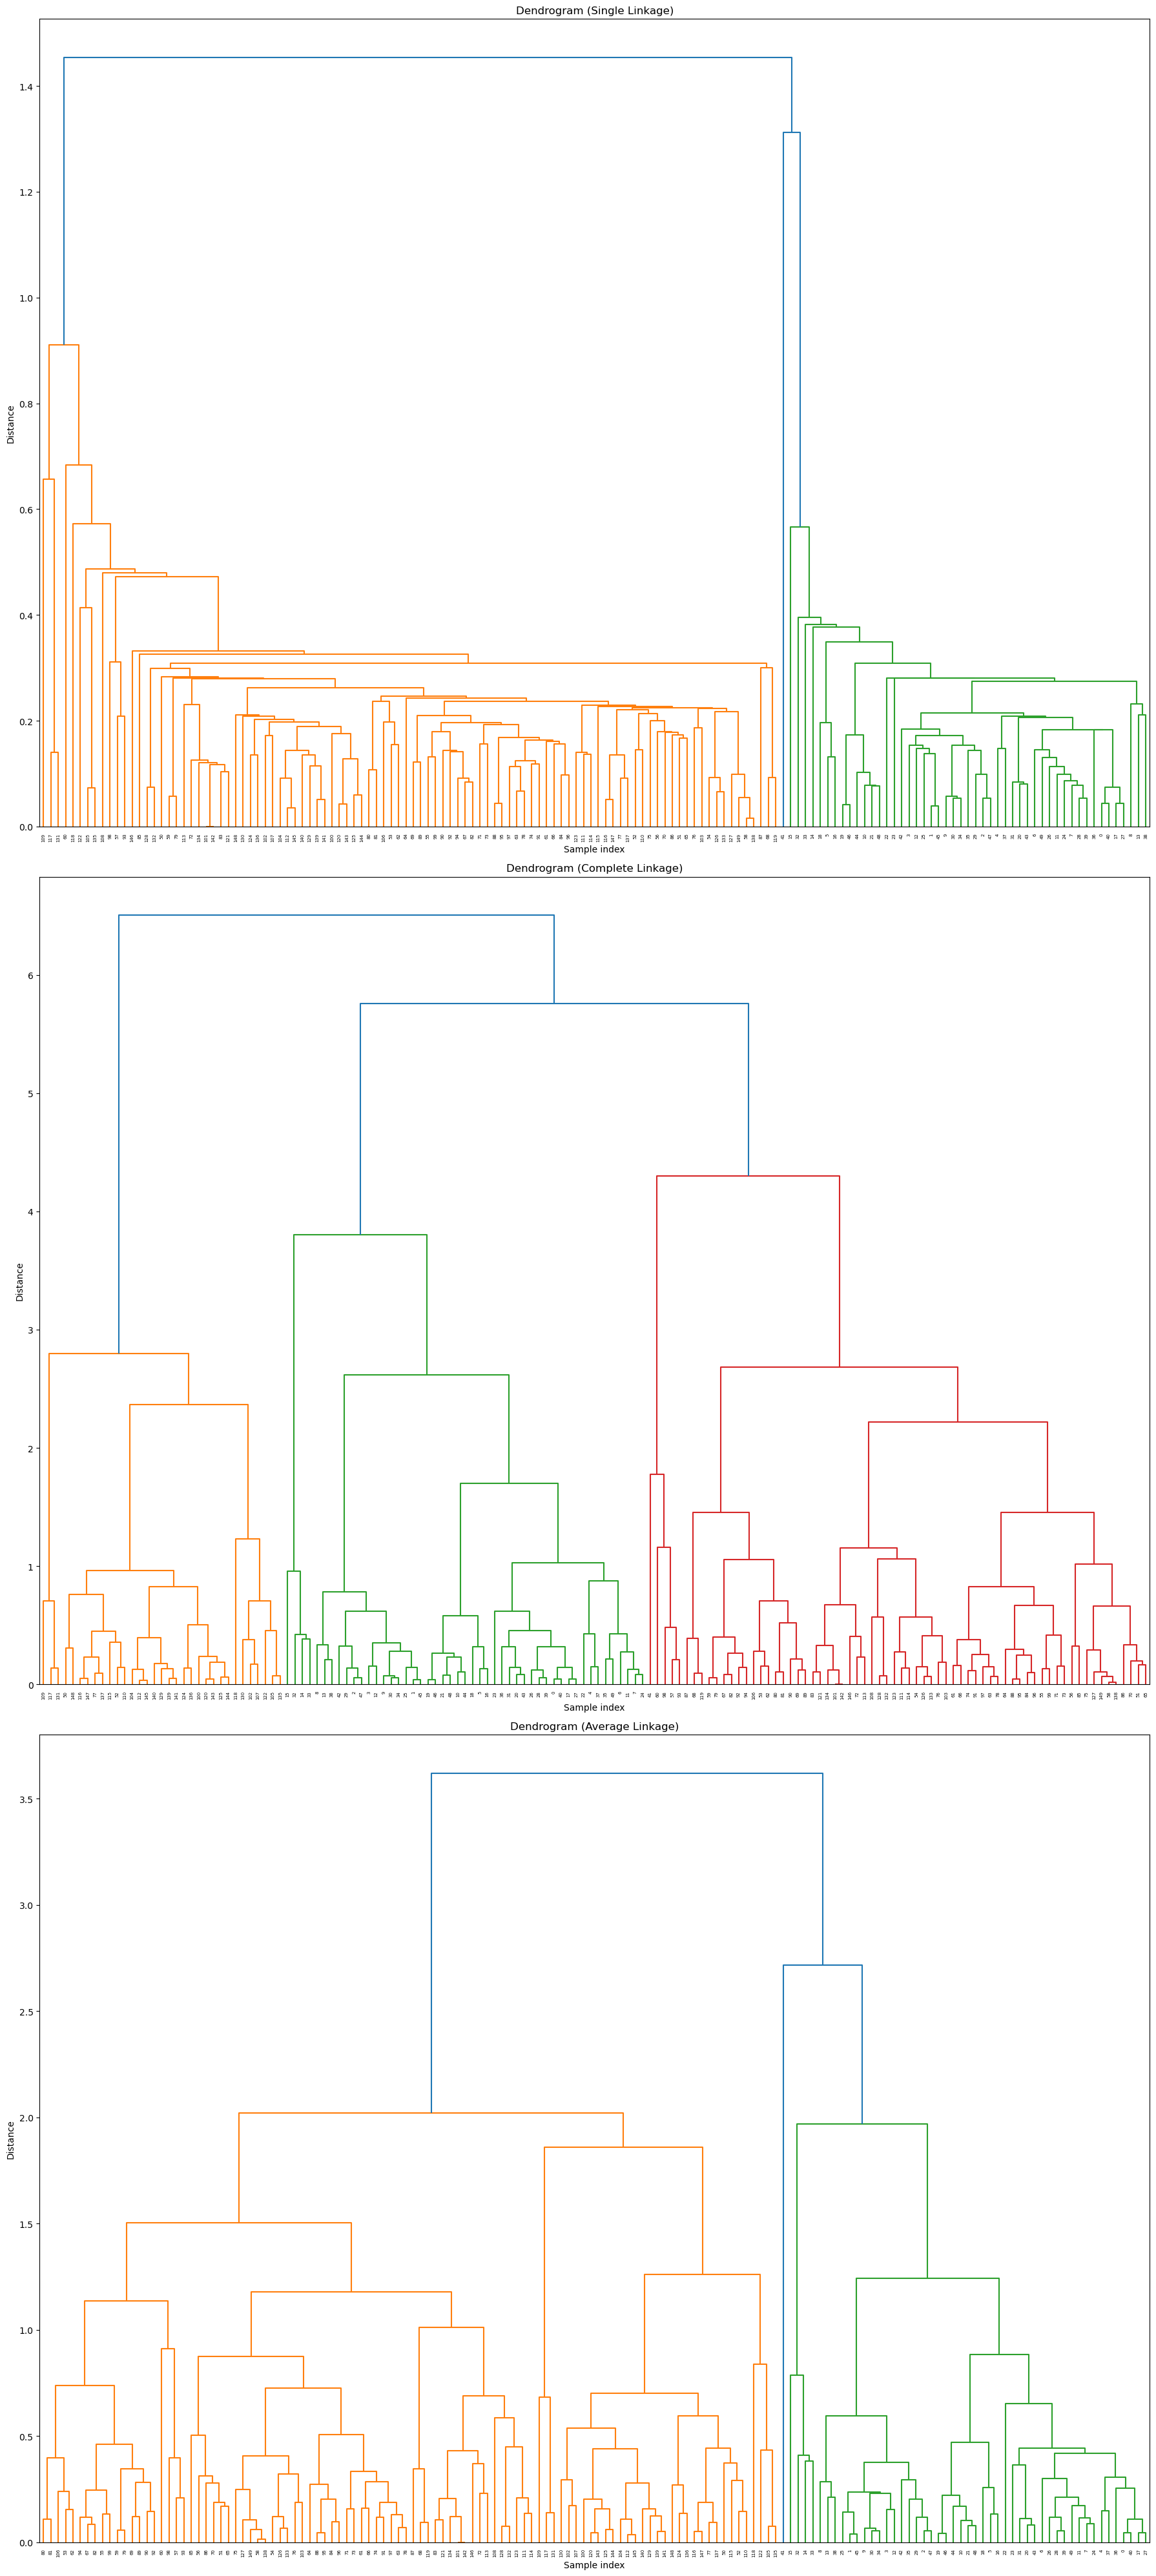

In [4]:
# Compute linkage matrices for different methods
methods = ['single', 'complete', 'average']
linkages = {method: linkage(X_pca, method=method) for method in methods}

# Plot dendrograms
plt.figure(figsize=(18, 40))
for i, method in enumerate(methods):
    plt.subplot(3, 1, i + 1)
    dendrogram(linkages[method])
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

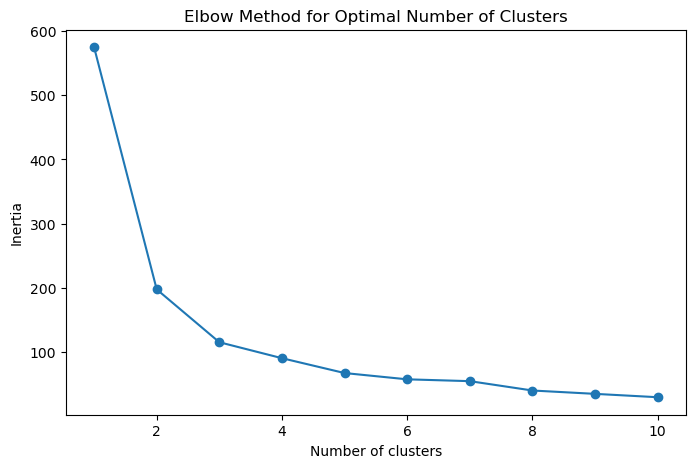

In [5]:
# Elbow method to find the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    if X_pca is not None:
        kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

3


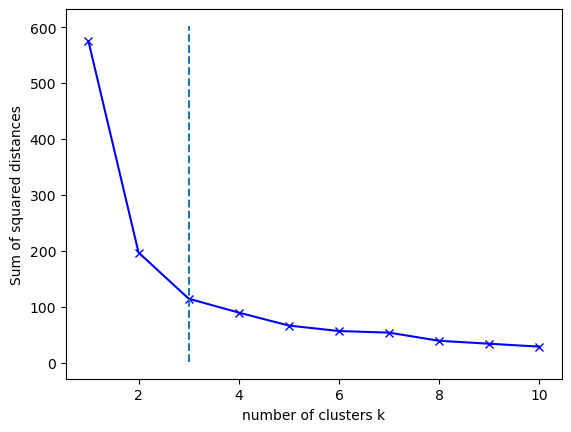

In [6]:
from kneed import KneeLocator
y = inertia
x = range(1, 11)
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.elbow)

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')